In [1]:
#The below is the data analysis of the titanic dataset 
#dataset credits - https://code.datasciencedojo.com/datasciencedojo/datasets
#Sibsp - # of siblings or spouse
#Parch - # of parents or chilren
#Embarked - given location of boarding the titanic
#Embarked=S -> boarded at Southampton, Embarked = C -> boraded at Cherbourg and Embarked = Q -> boarded at Queenstown

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import  warnings
warnings.filterwarnings('ignore')


In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


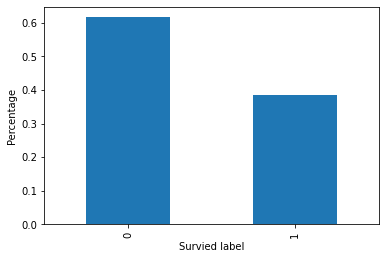

In [7]:
plt.xlabel("Survied label")
plt.ylabel("Percentage")
titanic['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [8]:
titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [9]:
titanic.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [10]:
print("The number of type of  tickets are {0}".format(titanic['Ticket'].nunique()))

The number of type of  tickets are 681


In [11]:
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
print("The number of type of  cabins are {0}".format(titanic['Cabin'].nunique()))

The number of type of  cabins are 147


In [13]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
print("The number of pickup points are  are {0}".format(titanic['Embarked'].nunique()))

The number of pickup points are  are 3


In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic_feat = titanic.copy()

In [17]:
titanic_feat['gender'] = titanic.Sex.map({'male':0,'female':1})
titanic_feat['Embarked'].fillna(value=titanic_feat.Embarked.value_counts(dropna=False).sort_values(ascending=False).index[0],axis=0,inplace=True)


In [18]:
titanic_feat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
titanic_feat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'gender'],
      dtype='object')

In [22]:
titanic_feat['surname'] = np.nan
titanic_feat['lady_marital_status'] = np.nan
titanic['isChild'] = np.nan

In [23]:
surnames = set()
index = 0
for name in titanic_feat['Name'].str.split(' '):
    full_name = ' '.join(name)
    titanic_feat.loc[index,'surname'] = name[0]
    titanic_feat['surname'] = titanic_feat['surname'].str.replace(',','')
    
    
    marital_check = re.findall("Mrs.",full_name)
#     print(marital_check,full_name)
    if ((len(marital_check) == 1) ):
        titanic_feat.loc[index,'lady_marital_status'] = 1
    elif len(re.findall("Miss.",full_name)) != 0:
        titanic_feat.loc[index,'lady_marital_status'] = 0
    else :
        titanic_feat.loc[index,'lady_marital_status'] = -1
        
        
    index+=1 


for index in range(titanic_feat.shape[0]):
    if titanic_feat.loc[index,'Age'] <15:
        titanic_feat.loc[index,'isChild'] = 1
    else:
        titanic_feat.loc[index,'isChild'] = 0
    

In [24]:
surname_count = titanic_feat.groupby('surname')['Name'].agg('count').reset_index()
surname_count.columns = ["surname","surname_ount"]

titanic_feat = pd.merge(titanic_feat,surname_count,how='left')

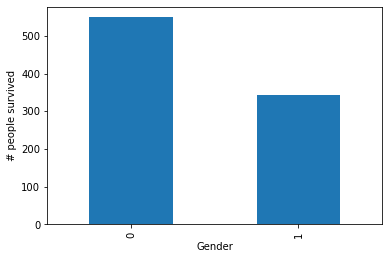

In [25]:
plt.xlabel("Gender")
plt.ylabel("# people survived")
titanic_feat['Survived'].value_counts().plot(kind='bar')
plt.show()

**Observation**
1. The number of women survivors are much more than the number of men
2. The number of male survivors are just around 300 while the number of women exceeds 500

In [26]:
total_passengers = titanic_feat.shape[0]
male_passengers = titanic_feat[titanic_feat['Sex'] == "male"].shape[0]
female_passengers = titanic_feat[titanic_feat['Sex'] == "female"].shape[0]
male_survivors = titanic_feat[((titanic_feat['Sex'] == "male") & (titanic_feat['Survived'] == 1))].shape[0]
female_survivors = titanic_feat[((titanic_feat['Sex'] == "female") & (titanic_feat['Survived'] == 1))].shape[0]

print("Ttoal number of people on borad {0}".format(total_passengers))
print("The number of men in the ship is {0}".format(male_passengers))
print("The number of women in the ship is {0}".format(female_passengers))
print("Percentage of men who survived {0}".format((male_survivors/male_passengers)*100))
print("Percentage of women who survived {0}".format((female_survivors/female_passengers)*100))
      


Ttoal number of people on borad 891
The number of men in the ship is 577
The number of women in the ship is 314
Percentage of men who survived 18.890814558058924
Percentage of women who survived 74.20382165605095


In [27]:
female_travellers = titanic_feat[titanic_feat['Sex'] == "female"]

<AxesSubplot:title={'center':'Histogram of age of female travellers'}, xlabel='Age', ylabel='Density'>

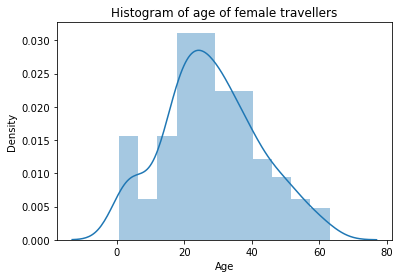

In [28]:
plt.title("Histogram of age of female travellers")
sns.distplot(female_travellers['Age'])

**Observation**
It can be seen that most of the women were between 20-30 years ofage

<AxesSubplot:ylabel='Survived'>

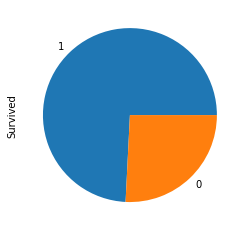

In [72]:
female_travellers['Survived'].value_counts().plot(kind='pie')

**Observation**
From the pie chart and data it is very evident that majority of the women survived the mishap, and of the total women 
who boarded the ship ~74% of them survived.

Now lets look deeper into the societal status,marital status, age and other factors of women who survived and who did not

<AxesSubplot:title={'center':'Marital status of women who survived..'}, xlabel='marital status', ylabel='Count'>

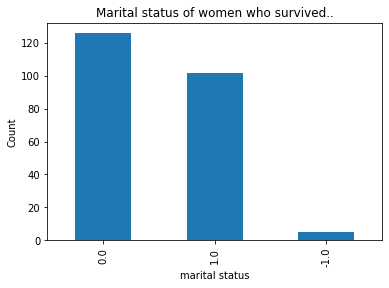

In [73]:
plt.title("Marital status of women who survived..")
plt.xlabel("marital status")
plt.ylabel("Count")
female_travellers[female_travellers['Survived'] == 1]['lady_marital_status'].value_counts().plot(kind='bar')

**Observation**

It is quite evident that the number of unmarried women who survived is much more than the number of married women

In [31]:
female_travellers[female_travellers['lady_marital_status']==-1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,surname,lady_marital_status,isChild,surname_ount
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,1,Aubart,-1.0,0.0,1
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,1,Reynaldo,-1.0,0.0,1
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,1,Sagesser,-1.0,0.0,1
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,1,Rothes,-1.0,0.0,1
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,Leader,-1.0,0.0,1


<AxesSubplot:>

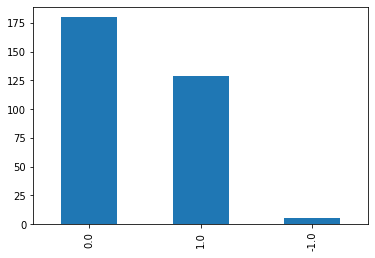

In [32]:
female_travellers['lady_marital_status'].value_counts().plot(kind='bar')

In [33]:
female_travellers[female_travellers['PassengerId']==760]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,surname,lady_marital_status,isChild,surname_ount
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,1,Rothes,-1.0,0.0,1


**Observation**

1. Among women the  number of unmarried women are more than the number of married ones.
2. Also, we can find a woman with a title of "Countess","Dr. whose survival status is survived.

In [34]:
titanic_feat[titanic_feat['Name'].str.contains("Thayer, Mr. John Borland Jr")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,surname,lady_marital_status,isChild,surname_ount
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,0,Thayer,-1.0,0.0,3


In [35]:
titanic_feat[titanic_feat['Name'].str.contains("Thayer")]['Name'].values

array(['Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Thayer, Mr. John Borland Jr',
       'Thayer, Mrs. John Borland (Marian Longstreth Morris)',
       'Thayer, Mr. John Borland'], dtype=object)

In [36]:
print("the numbe of women who were accompanied by some mber of the family {0}".format(female_travellers[((female_travellers['SibSp'] >= 1) | (female_travellers['Parch'] >= 1))].shape[0]))

the numbe of women who were accompanied by some mber of the family 188


<AxesSubplot:title={'center':'Analysis of women who had one or more travel companion'}, xlabel='Survival Status', ylabel='Count'>

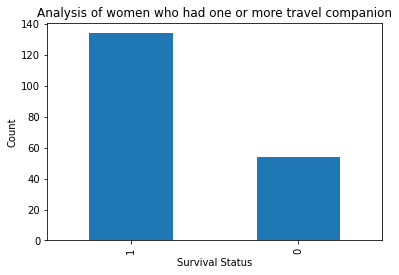

In [74]:
plt.title("Analysis of women who had one or more travel companion")
plt.xlabel("Survival Status")
plt.ylabel("Count")
female_travellers[((female_travellers['SibSp'] >= 1) | (female_travellers['Parch'] >= 1))]['Survived'].value_counts().plot(kind='bar')

**Observation**
From the bar chart it is very evident that among 188 women who had company, close to 130 of them have survived while around 50 of them died.

134

In [81]:
number_of_women_with_relative_survived = female_travellers[((female_travellers['SibSp'] >= 1) | (female_travellers['Parch'] >= 1))]['Survived'].value_counts().values[0]
number_total_women_survivors = female_travellers[female_travellers['Survived'] == 1].shape[0]
percentage_of_women_with_relative_survived = (number_of_women_with_relative_survived/number_total_women_survivors)*100
print("percentage of women with relatives who survived {0}".format(percentage_of_women_with_relative_survived))



percentage of women with relatives who survived 57.5107296137339


<AxesSubplot:title={'center':'Analysis of marital sttaus who came with compay'}, xlabel='Marital Status', ylabel='Count'>

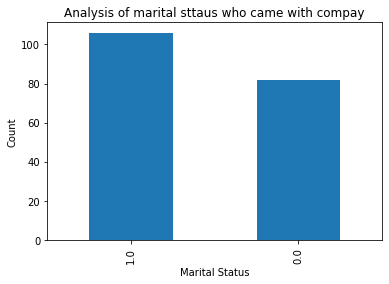

In [49]:
plt.title("Analysis of marital sttaus who came with compay")
plt.xlabel("Marital Status")
plt.ylabel("Count")

female_travellers[((female_travellers['SibSp'] >= 1) | (female_travellers['Parch'] >= 1))  ]['lady_marital_status'].value_counts().plot(kind='bar')

**Observation**

Among women who came with relatives, the number of married women exceeds the unmarried ones

<AxesSubplot:title={'center':'Marital status of women who were accompanied with relatives and who survived'}, xlabel='Marital Status', ylabel='Count'>

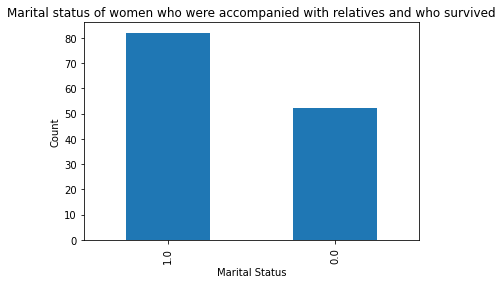

In [50]:
plt.title("Marital status of women who were accompanied with relatives and who survived")
plt.xlabel("Marital Status")
plt.ylabel("Count")

female_travellers[((female_travellers['SibSp'] >= 1) | (female_travellers['Parch'] >= 1))  & (female_travellers['Survived'] == 1)]['lady_marital_status'].value_counts().plot(kind='bar')

**Observation**
Among 188 accompanied women and 133 among them who survied, it is seen that 82 of them were married.

<AxesSubplot:xlabel='Age', ylabel='Density'>

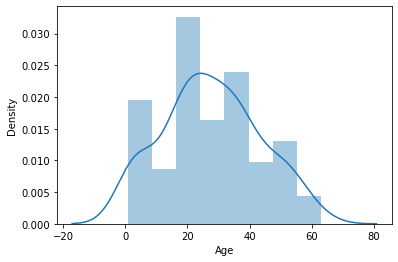

In [39]:
sns.distplot(female_travellers[((female_travellers['SibSp'] >= 1) | (female_travellers['Parch'] >= 1))  & (female_travellers['Survived'] == 1)]['Age'])

**Observations**

Most of the women who survived where in the age rage of 20-25 years.
The next fequent group was in the age range of 35 to 40 years

In [40]:
female_travellers['SibSp_company'] = ((female_travellers['SibSp'] >= 1) & (female_travellers['Parch'] == 0))
female_travellers['Parch_company'] = ((female_travellers['Parch'] >= 1) & (female_travellers['SibSp'] == 0))
female_travellers['Sibsp_Parch_company'] = ((female_travellers['SibSp'] >= 1) & (female_travellers['Parch'] >= 1))

female_travellers['SibSp_company'] = female_travellers['SibSp_company'].map({True:1,False:0})
female_travellers['Parch_company'] = female_travellers['Parch_company'].map({True:1,False:0})
female_travellers['Sibsp_Parch_company'] = female_travellers['Sibsp_Parch_company'].map({True:1,False:0})

In [41]:
print("percentage of women accompied by Sibilings/Spouse only and survived {0}".format(((female_travellers[(female_travellers['SibSp_company']==1) & (female_travellers['Survived'] == 1)].shape[0])/(female_travellers[female_travellers['SibSp_company']==1].shape[0]))*100))
print("percentage of women accompied by Parents/Children only and survived {0}".format(((female_travellers[(female_travellers['Parch_company']==1) & (female_travellers['Survived'] == 1)].shape[0])/(female_travellers[female_travellers['Parch_company']==1].shape[0]))*100))
print("percentage of women accompied by Sibilings/Spouse and Parents/Children  and survived {0}".format(((female_travellers[(female_travellers['Sibsp_Parch_company']==1) & (female_travellers['Survived'] == 1)].shape[0])/(female_travellers[female_travellers['Sibsp_Parch_company']==1].shape[0]))*100))

percentage of women accompied by Sibilings/Spouse only and survived 79.41176470588235
percentage of women accompied by Parents/Children only and survived 79.16666666666666
percentage of women accompied by Sibilings/Spouse and Parents/Children  and survived 58.333333333333336


**Observation**

Taking into consideration women who travelled only with Spouse or  sibling it can be seen that of all of them 79% of them survived

Taking into consideration women who travelled only with parents/chidren it can be seen that of all of them 79% of them survived

While women who travelled with bith siblibgs/Spouse and Parents/Children only 58% of them managed to survive.

It is clear that woman travelling with a spouse/sibling or parent/children have had higher chances or survival than 
the ones travelling with both the groups 

<AxesSubplot:xlabel='SibSp_company', ylabel='Age'>

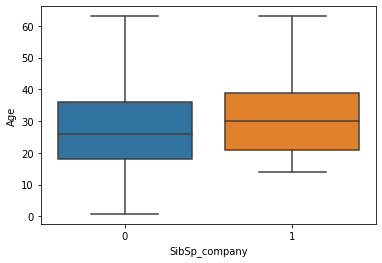

In [42]:
sns.boxplot(x = female_travellers["SibSp_company"],y=female_travellers['Age'],data = female_travellers)

<AxesSubplot:xlabel='Parch_company', ylabel='Age'>

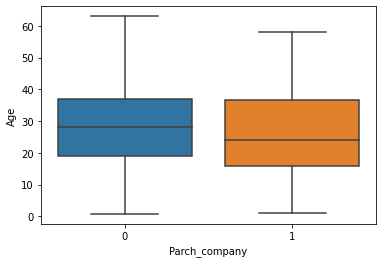

In [43]:
sns.boxplot(x = female_travellers["Parch_company"],y=female_travellers['Age'],data = female_travellers)

<AxesSubplot:xlabel='Sibsp_Parch_company', ylabel='Age'>

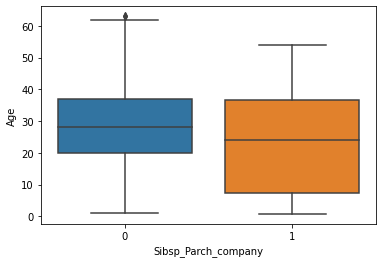

In [44]:
sns.boxplot(x = female_travellers["Sibsp_Parch_company"],y=female_travellers['Age'],data = female_travellers)

**Observation**

In Sibsp and Parch the 25th,50th and 75th percentile value are ages lyinh between 21-40 yrs and 15-38 yrs apprx respectively.


In Sibsp & Parch combination the age group lie apprx. betweeen 5 to 40 yrs.


 <h3>Summary so far... </h3>
 
 1. The number of women who survived is more than the numner of men, this reflects that man though outnumbered women gave way for women to escape
 2. The number of unmarried women in the titanic were more than the number of married women
 3. The number of unmarried women who survived is more than the number of married women
 4. The number of married women who came with a relative were more than the number of unmarried ones
 5. Among women who came with company and those who survived most of them were found to have been married.
 6. Approx. 58% of women who travelled with relatives survived from the mishap. Of this 58% majority of them were married.
 

In [56]:
female_travellers[female_travellers['lady_marital_status']==-1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,surname,lady_marital_status,isChild,surname_ount,SibSp_company,Parch_company,Sibsp_Parch_company
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,1,Aubart,-1.0,0.0,1,0,0,0
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,1,Reynaldo,-1.0,0.0,1,0,0,0
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,1,Sagesser,-1.0,0.0,1,0,0,0
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,1,Rothes,-1.0,0.0,1,0,0,0
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,Leader,-1.0,0.0,1,0,0,0


**Observation**

1. there were 5 women whose marital status is unknown among them there was a Countess, a Doctor and Mademousile(synonym for Miss in Framce) all of whom happened to be !st class passengers who survived
2. All these women were  not accompanied by any relative on their travel.
3. It can be quite evident that women who held higher positions in the society have managed to survive, however the number of such individuals is small to cme to a constructive conclusion

<AxesSubplot:xlabel='Age', ylabel='Density'>

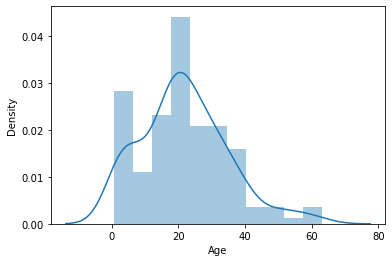

In [62]:
sns.distplot(female_travellers[female_travellers['lady_marital_status'] == 0])

In [63]:
female_travellers[female_travellers['Survived'] == 1]['lady_marital_status'].value_counts()

 0.0    126
 1.0    102
-1.0      5
Name: lady_marital_status, dtype: int64

In [64]:
female_travellers['lady_marital_status'].value_counts()

 0.0    180
 1.0    129
-1.0      5
Name: lady_marital_status, dtype: int64

In [65]:
titanic_feat['lady_marital_status'].value_counts()

-1.0    582
 0.0    180
 1.0    129
Name: lady_marital_status, dtype: int64

<AxesSubplot:title={'center':'Passenger class of women who travelled'}, xlabel='Passenger class of women who travelled', ylabel='Count'>

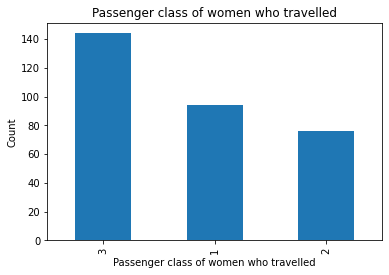

In [58]:
plt.title("Passenger class of women who travelled")
plt.xlabel("Passenger class of women who travelled")
plt.ylabel("Count")
female_travellers.Pclass.value_counts().plot(kind='bar')

**Observation**

1. The number of women who travelled 3rd class is much more than any other class
2. This is followed by the number of women who travelled 1st class.
3. 

<AxesSubplot:title={'center':'Marital status of women who were accompanied with relatives and who survived'}, xlabel='Marital Status', ylabel='Count'>

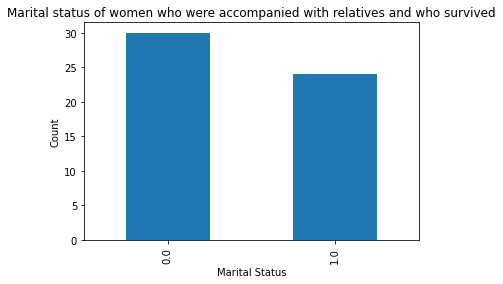

In [55]:
plt.title("Marital status of women who were accompanied with relatives and who survived")
plt.xlabel("Marital Status")
plt.ylabel("Count")

female_travellers[((female_travellers['SibSp'] >= 1) | (female_travellers['Parch'] >= 1))  & (female_travellers['Survived'] == 0)]['lady_marital_status'].value_counts().plot(kind='bar')

In [392]:
female_travellers[female_travellers.Name.str.contains("Sandstrom")]['Name'].values

array(['Sandstrom, Miss. Marguerite Rut',
       'Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)'],
      dtype=object)

In [371]:
female_travellers[((female_travellers['Sibsp_Parch_company'] == 1) & (female_travellers['isChild'] ==1))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,surname,lady_marital_status,isChild,surname_ount,SibSp_company,Parch_company,Sibsp_Parch_company
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,1,Sandstrom,0.0,1.0,2,0,0,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,1,Palsson,0.0,1.0,4,0,0,1
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,1,Laroche,0.0,1.0,3,0,0,1
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,1,West,0.0,1.0,3,0,0,1
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,1,Andersson,0.0,1.0,9,0,0,1
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2,W./C. 6608,34.3750,NaN,S,1,Ford,0.0,1.0,4,0,0,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,1,Johnson,0.0,1.0,6,0,0,1
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S,1,Asplund,0.0,1.0,4,0,0,1
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,1,Allison,0.0,1.0,3,0,0,1
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.00,3,1,349909,21.0750,NaN,S,1,Palsson,0.0,1.0,4,0,0,1


In [214]:
titanic_feat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,surname,lady_marital_status,isChild,surname_ount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Braund,-1.0,0.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Cumings,1.0,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Heikkinen,0.0,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Futrelle,1.0,0.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Allen,-1.0,0.0,2


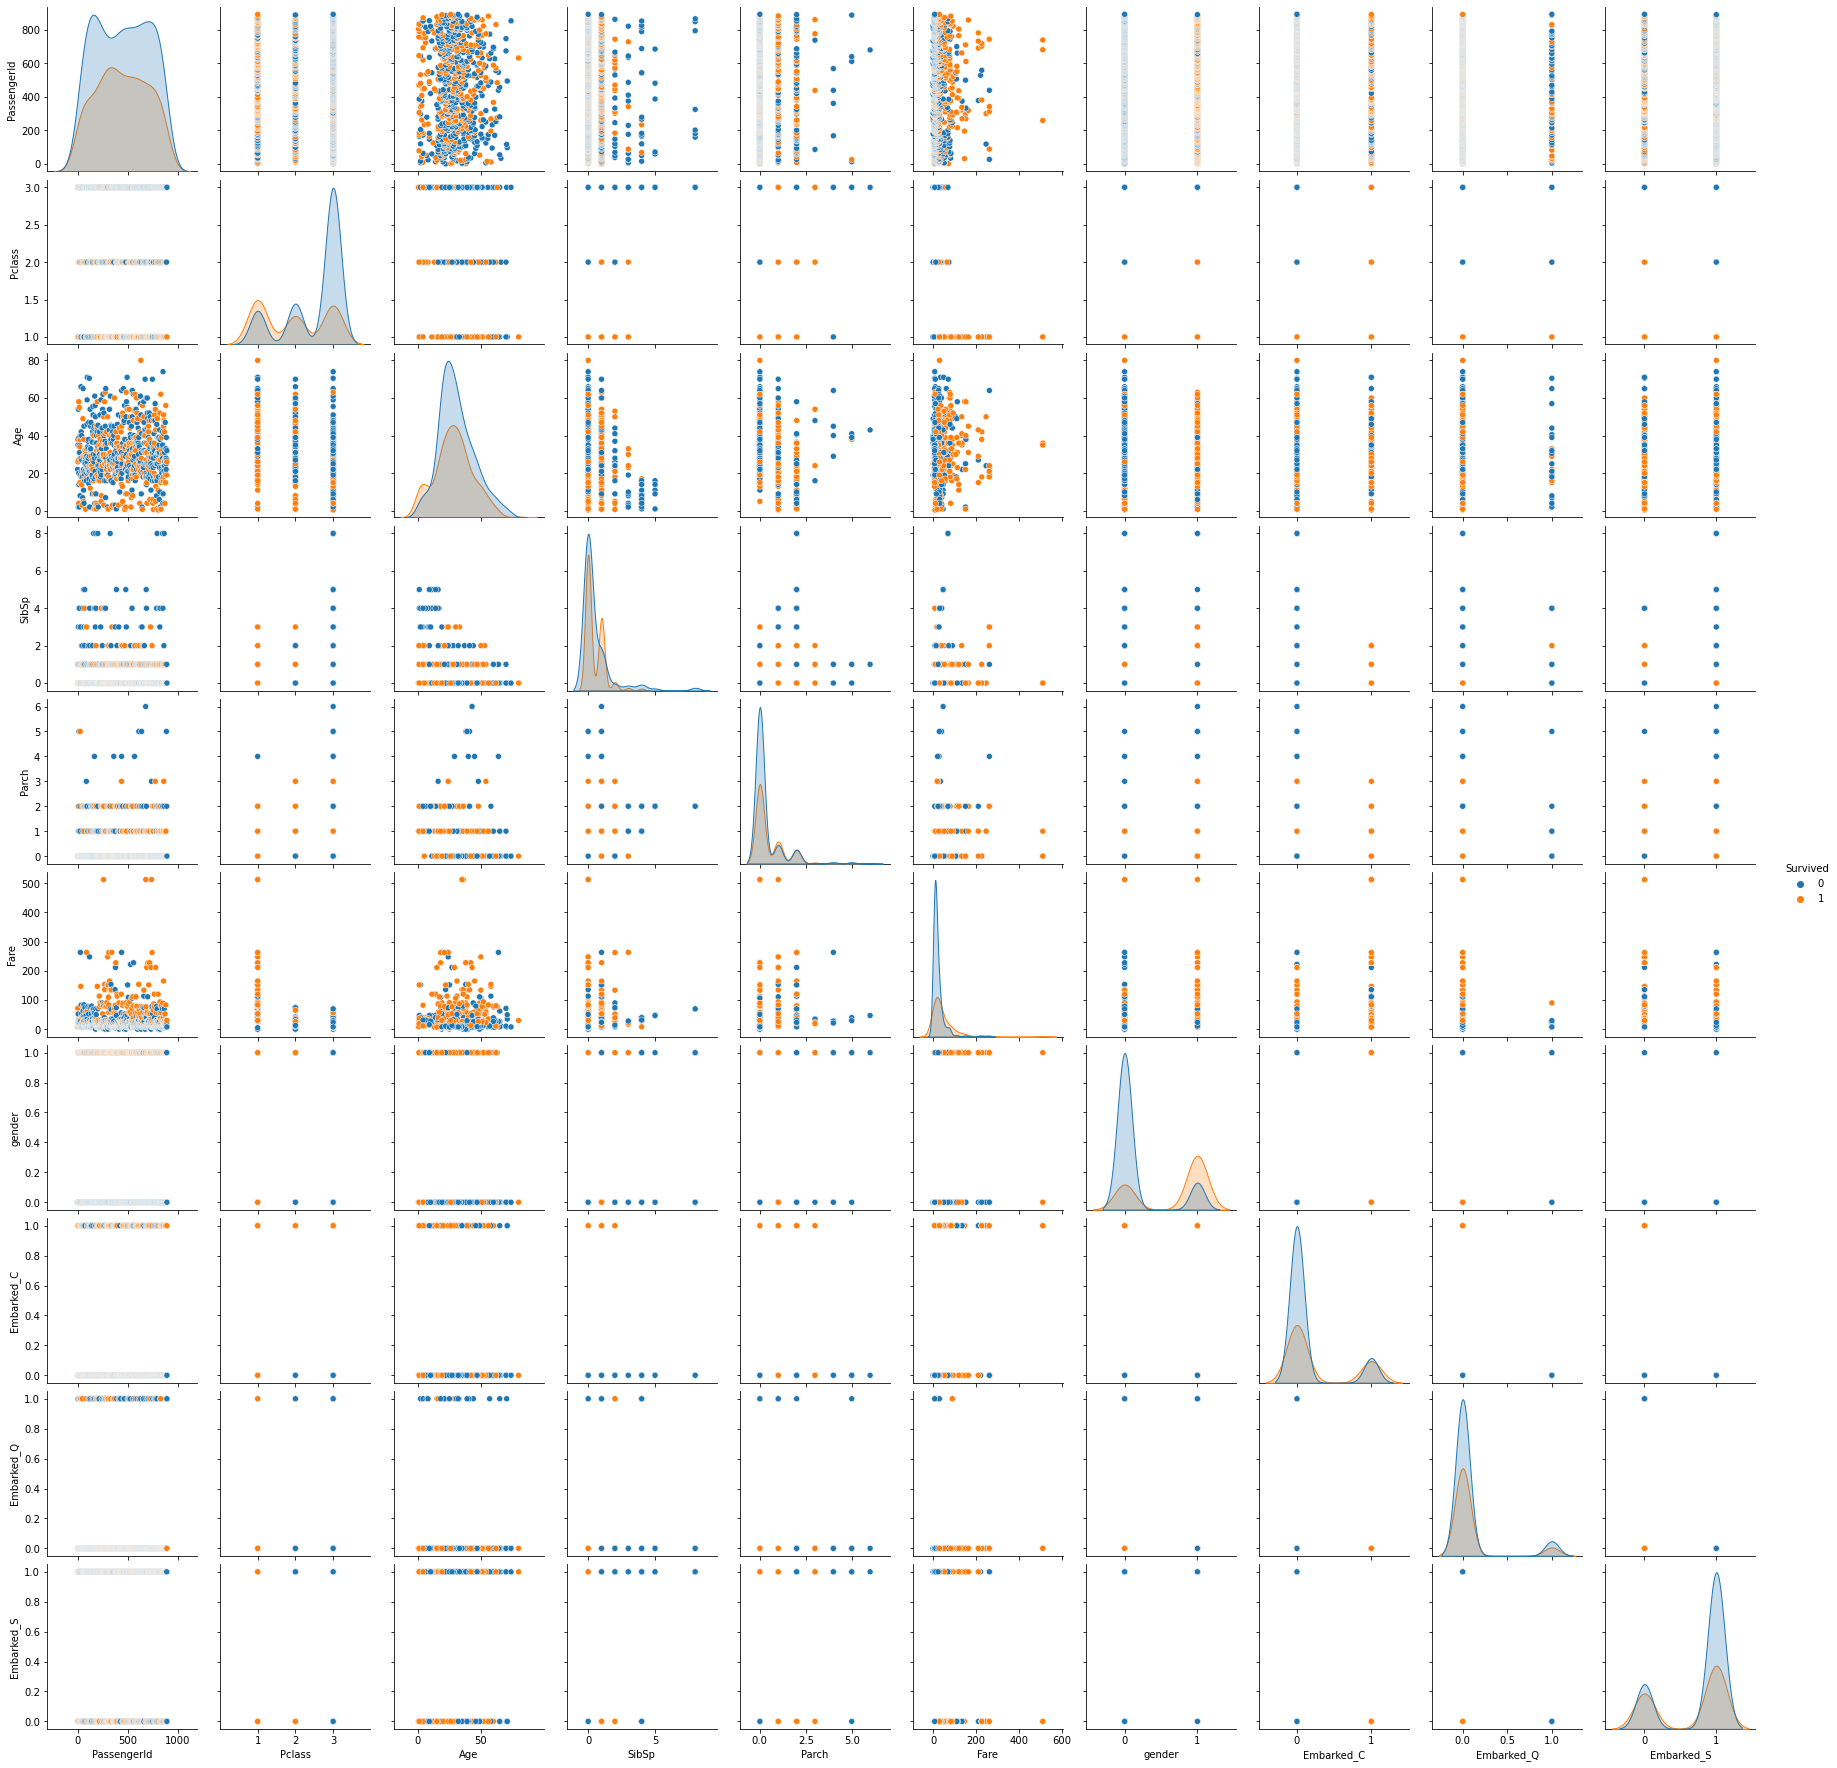

In [22]:
sns.pairplot(data=titanic_feat,hue='Survived')

**Observation**

From pairplot we can see that there is no pair of features with which the the survived can be linearly seprated from not survived

<AxesSubplot:ylabel='Density'>

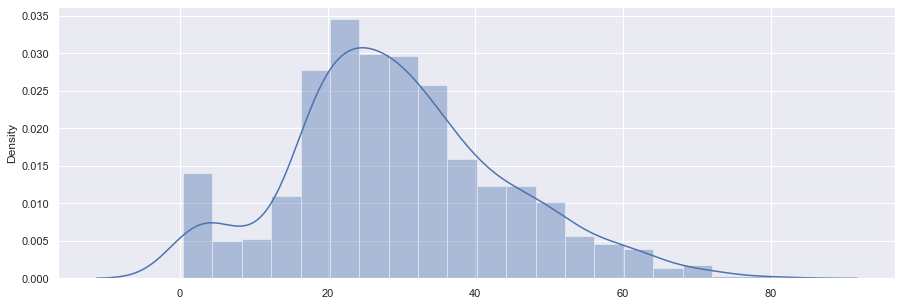

In [98]:
sns.distplot(x=titanic_feat.Age)

**Observation**
We see that many people who had traveeled on the Titanic were between 25 to 35 years of age

<AxesSubplot:ylabel='Density'>

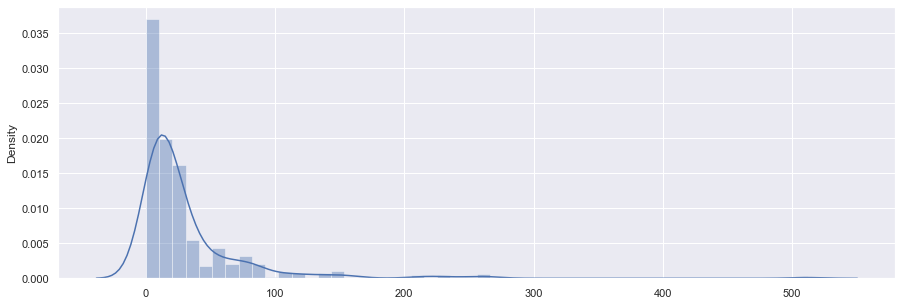

In [99]:
sns.distplot(x=titanic_feat.Fare)

**Observation**

1. The distribution of the Fare data is right skewed.
2. There are a very few people who paid more than $100 on a trip in Titanic


In [109]:
print('Quantile for Fare ',np.percentile(titanic_feat['Fare'],np.arange(0,100,25)))

Quantile for Fare  [ 0.      7.9104 14.4542 31.    ]


**Observation**
75% of passengers have paid a Fare amount of <= $31

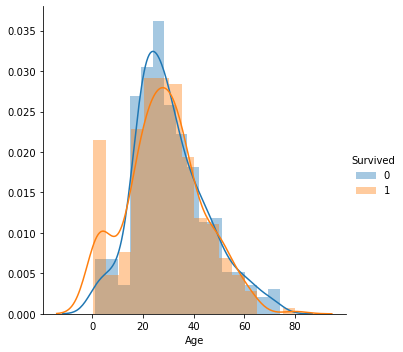

In [23]:
sns.FacetGrid(titanic_feat,hue="Survived",size=5) \
   .map(sns.distplot,"Age") \
   .add_legend()
plt.show();


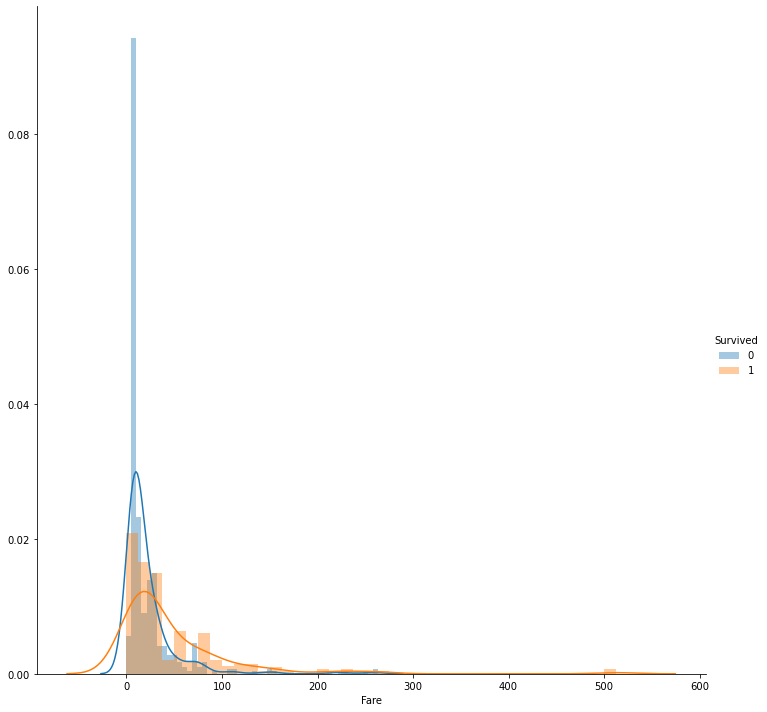

In [24]:
sns.FacetGrid(titanic_feat,hue="Survived",size=10) \
   .map(sns.distplot,"Fare") \
   .add_legend()
plt.show();


In [25]:
titanic_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,3,22.0,1,0,7.2500,0,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,1,0,0,1
2,3,3,26.0,0,0,7.9250,1,0,0,1,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,1
4,5,3,35.0,0,0,8.0500,0,0,0,1,0


In [26]:
survived = titanic_feat[titanic_feat.Survived == 1]
non_surv = titanic_feat[titanic_feat.Survived == 0]

Text(0.5, 1.0, 'GENDER')

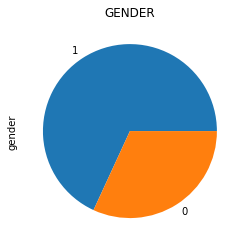

In [27]:
survived.gender.value_counts().plot(kind='pie').set_title('GENDER')

In [28]:
titanic_feat.gender.value_counts().sort_index(ascending=False)

1    314
0    577
Name: gender, dtype: int64

In [87]:
survived.gender.value_counts().sort_index()

0    109
1    233
Name: gender, dtype: int64

In [84]:
non_surv.gender.value_counts()

0    468
1     81
Name: gender, dtype: int64

Text(0.5, 1.0, 'GENDER')

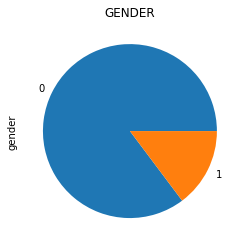

In [29]:
non_surv.gender.value_counts().plot(kind='pie').set_title('GENDER')

In [30]:
print('The percentage of women in the titanic ship ',(np.mean(titanic_feat.gender)*100))
print('The percentage of men in the titanic ship ',(1-np.mean(titanic_feat.gender))*100)
print('The percentage of women who survived the titanic ship is ',((survived.gender.value_counts().sort_index(ascending=False).values[0])/(titanic_feat.gender.value_counts().sort_index(ascending=False).values[0]))*100)
print('The percentage of women who survived the titanic ship is ',((survived.gender.value_counts().sort_index(ascending=False).values[1])/(titanic_feat.gender.value_counts().sort_index(ascending=False).values[1]))*100)

The percentage of women in the titanic ship  35.24130190796858
The percentage of men in the titanic ship  64.75869809203144
The percentage of women who survived the titanic ship is  74.20382165605095
The percentage of women who survived the titanic ship is  18.890814558058924


**Observation**

We see that though the number of men are greater than the number of women, the number of women who survived the titanic is much greater than the number of men

Text(0.5, 1.0, 'Passenger Class')

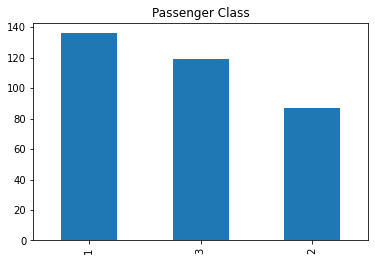

In [31]:
survived.Pclass.value_counts().plot(kind='bar').set_title('Passenger Class')

Text(0.5, 1.0, 'Passenger Class')

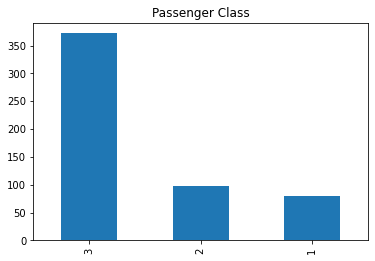

In [32]:
non_surv.Pclass.value_counts().plot(kind='bar').set_title('Passenger Class')

In [38]:
first_class_total = titanic_feat.Pclass.value_counts().sort_index().values[0]
second_class_total = titanic_feat.Pclass.value_counts().sort_index().values[1]
third_class_total = titanic_feat.Pclass.value_counts().sort_index().values[2]
first_class_surv = survived.Pclass.value_counts().sort_index().values[0]
second_class_surv = survived.Pclass.value_counts().sort_index().values[1]
third_class_surv = survived.Pclass.value_counts().sort_index().values[2]
print('The percentage of survivors in the 1st class is ',(first_class_surv/first_class_total)*100)
print('The percentage of survivors in the 2nd class is ', (second_class_surv/second_class_total)*100)
print('The percentage of survivors in the 3rd class is ', (third_class_surv/third_class_total)*100)

The percentage of survivors in the 1st class is  62.96296296296296
The percentage of survivors in the 2nd class is  47.28260869565217
The percentage of survivors in the 3rd class is  24.236252545824847


**Observation**

We see that the percentage of people who survived are higher in the first class

In [39]:
titanic_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,3,22.0,1,0,7.2500,0,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,1,0,0,1
2,3,3,26.0,0,0,7.9250,1,0,0,1,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,1
4,5,3,35.0,0,0,8.0500,0,0,0,1,0


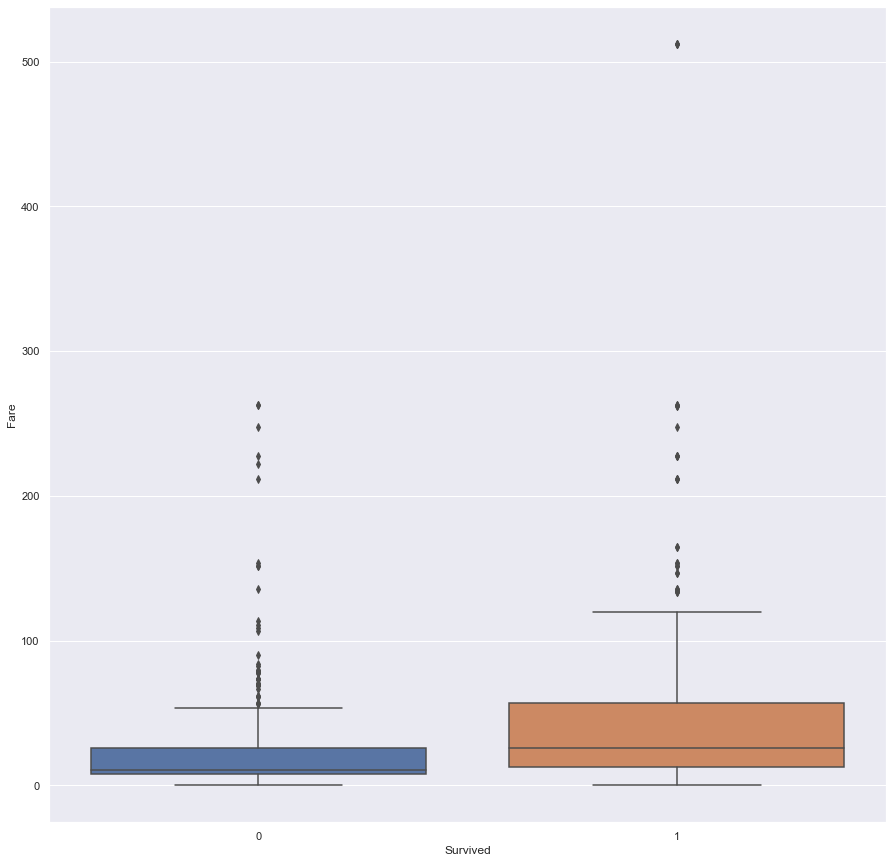

In [114]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,15)})
sns.boxplot(data=titanic_feat,x='Survived',y='Fare') 
plt.show()

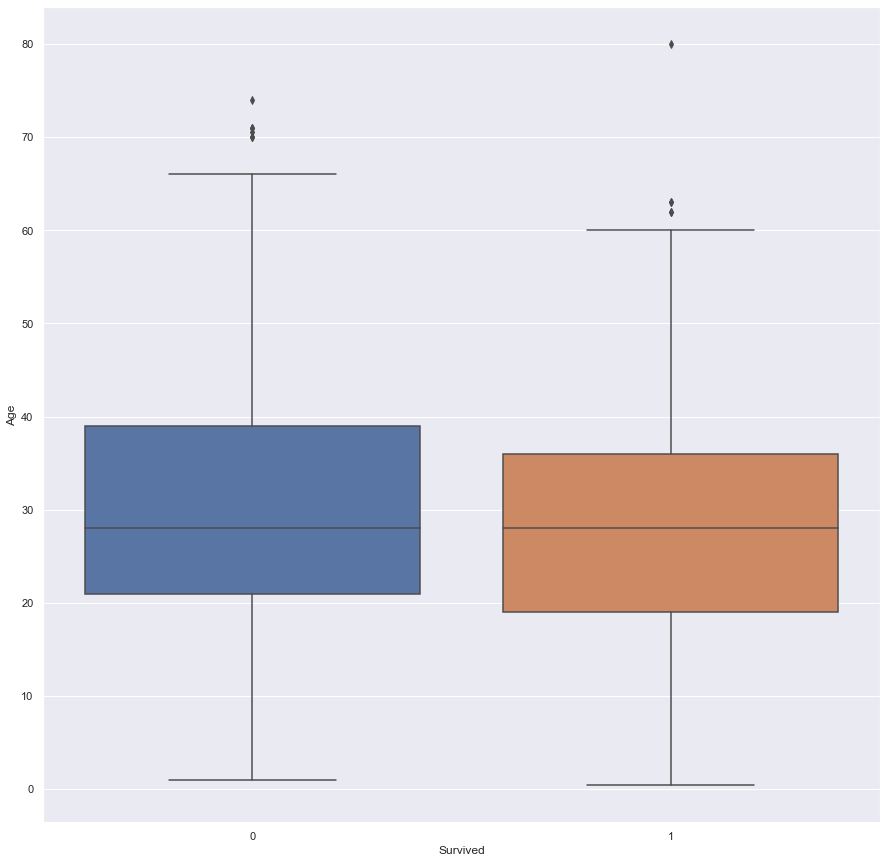

In [115]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,15)})
sns.boxplot(data=titanic_feat,x='Survived',y='Age') 
plt.show()

**Observation**
We see that the number of Sibsp is indiffreny incase of survived and non survived members

<AxesSubplot:>

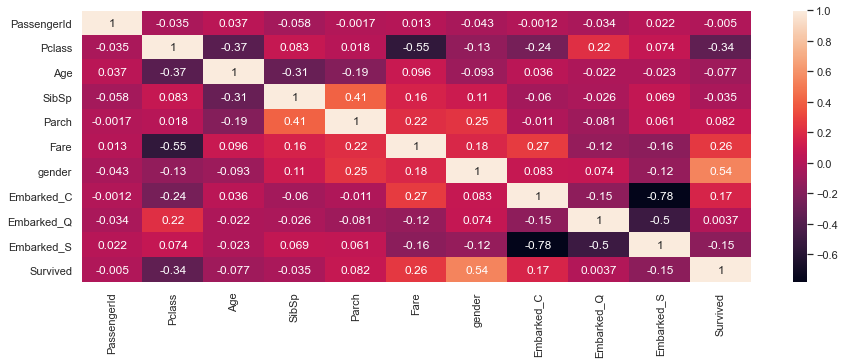

In [80]:
corr = titanic_feat.corr()
sns.heatmap(corr,annot=True)

In [93]:
age_bin = pd.cut(titanic_feat.Age,bins=4,retbins=True)[0]

<AxesSubplot:xlabel='Age', ylabel='count'>

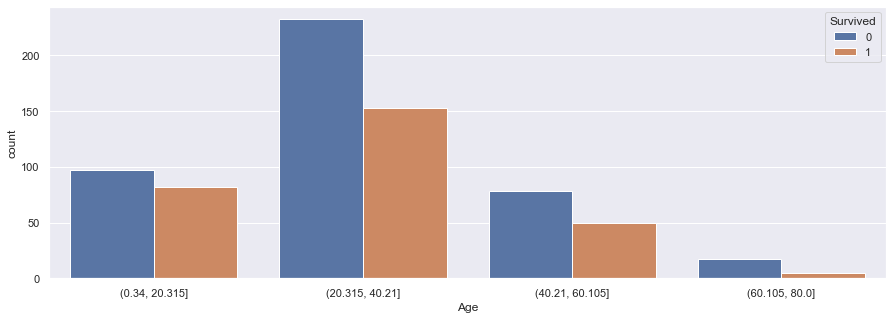

In [94]:
sns.countplot(x=age_bin,hue=titanic_feat.Survived)

<AxesSubplot:xlabel='Age', ylabel='count'>

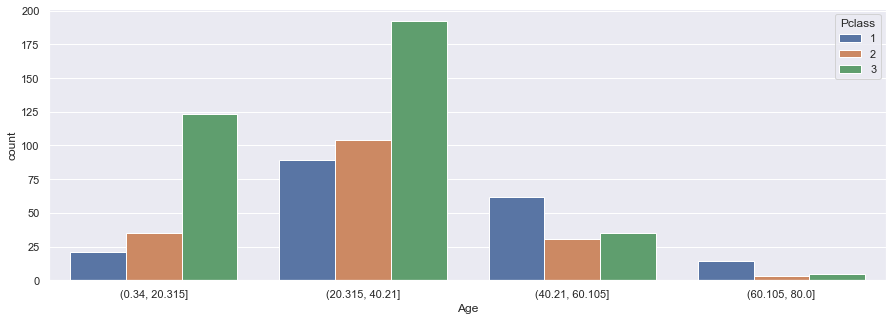

In [110]:
sns.countplot(x=age_bin,hue=titanic_feat.Pclass)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

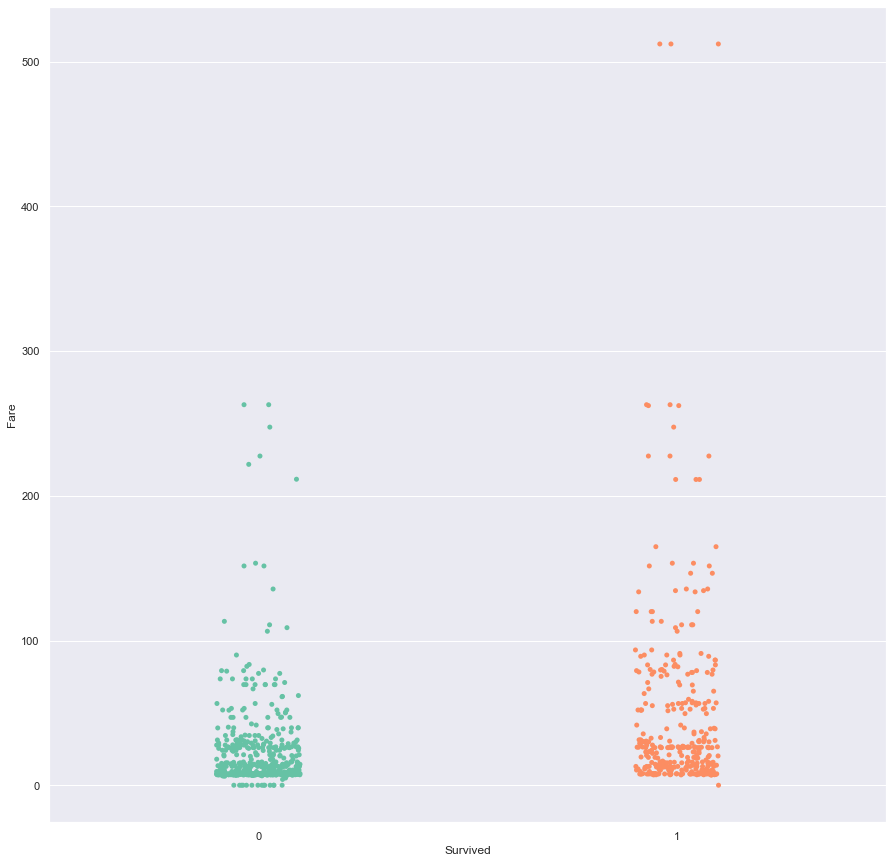

In [117]:
sns.stripplot(x=titanic_feat.Survived,y=titanic_feat.Fare,palette='Set2')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

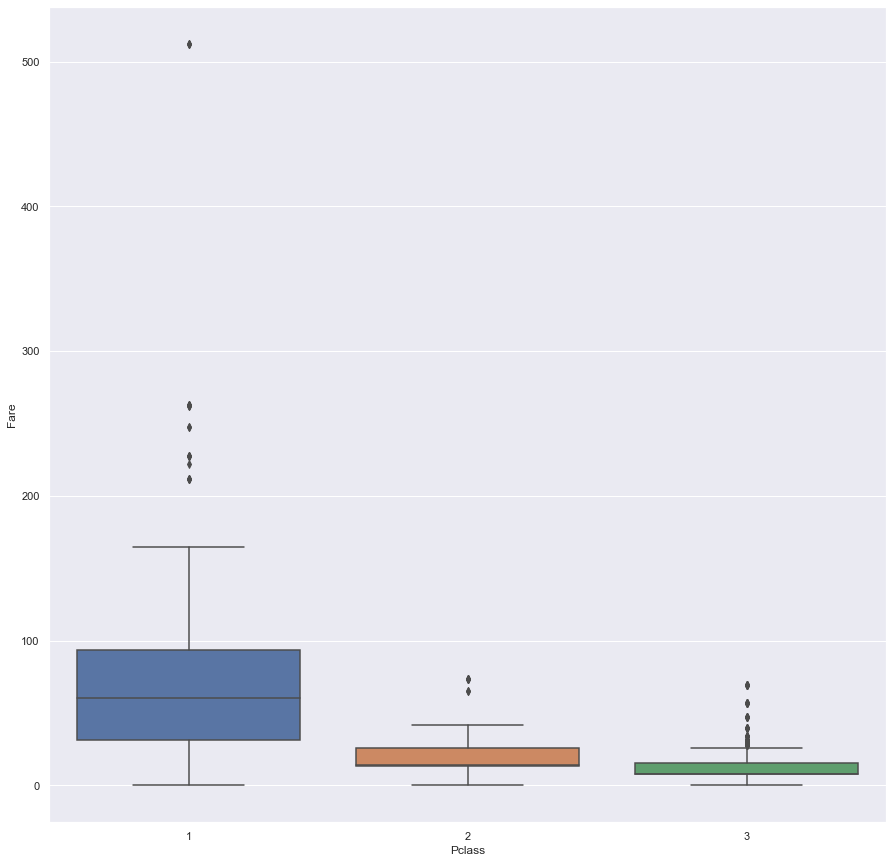

In [119]:
sns.boxplot(x=titanic.Pclass,y=titanic.Fare)

**Observation**

1. Passengers of class 1 have paid much higher Fare when compared to passengers of 2nd and 3rd class
2. 75% of people in class 1 have paid a Fare of close to \$90
3. While 75th percentile in the 2nd and 3rd class are even less than $50

Conclusion - 1st class is the most expensive when compared to 2nd and 3rd classes

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

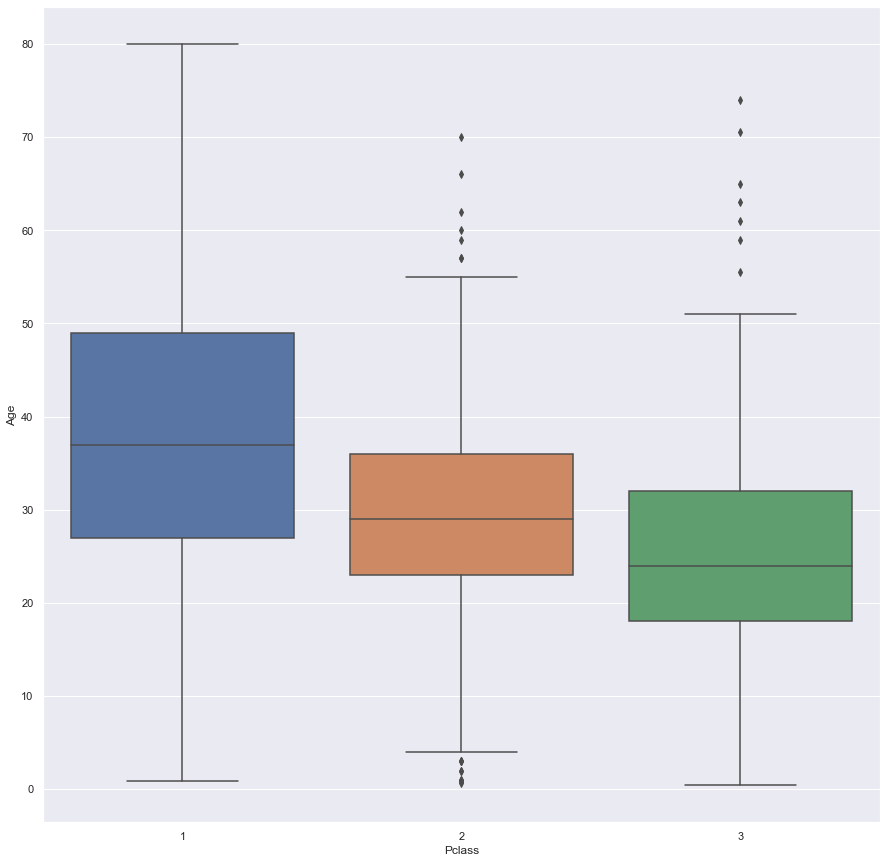

In [120]:
sns.boxplot(x=titanic.Pclass,y=titanic.Age)

**Observation**

1. 75 percentile of people who travelled in 1st class are aged close to 50 years
2. 50th percentile or the median is close to 38 years of Age 
3. While in class 2 the 50th percentile is close to 30 years and the 75th percetile is close to 35 years
4. In 3rd class the 50th percentile is around 25 years while 75th percentile is close to 30 years

Conclusion - Which means the ability to travel in a good class(1st class) comes with income done over time

In [122]:
#Refrences 
#https://www.kaggle.com/onedatareader/titanic-data-analysis/notebook
#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
#https://seaborn.pydata.org/generated/seaborn.stripplot.html